In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('./Data/Preprocessed_Data.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data = data.copy()

In [4]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0,0,0,0,0,0,0,0,1,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0,0,0,0,0,0,0,0,1,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0,0,0,0,0,0,0,0,1,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0,0,0,0,0,0,0,0,1,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,1,0,0,0,0,0,0,0,0,1
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,0,0,0,0,0,0,0,0,1,0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,0,0,0,0,0,0,0,0,1,0
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,0,0,0,0,0,0,0,0,0,1


# PD Model

## Data Preparation for PD Model

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [5]:
print(loan_data['loan_status'].nunique())
print(loan_data['loan_status'].unique())

9
['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [6]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [7]:
print(loan_data['loan_status'].nunique())
print(loan_data['loan_status'].count())
print(len(loan_data['loan_status']))

9
466285
466285


In [8]:
# Get the proportion (percentage) for each loan status 
round(loan_data['loan_status'].value_counts() / loan_data['loan_status'].count(),3)

Current                                                0.481
Fully Paid                                             0.396
Charged Off                                            0.091
Late (31-120 days)                                     0.015
In Grace Period                                        0.007
Does not meet the credit policy. Status:Fully Paid     0.004
Late (16-30 days)                                      0.003
Default                                                0.002
Does not meet the credit policy. Status:Charged Off    0.002
Name: loan_status, dtype: float64

- Good / Non Default = 1
        Current, Fully Paid, In Grace Period, Does not meet the credit policy, Status:Fully Paid, Late (16-30 days)
- Bad / Default = 0
        Charged Off, Late (31-120 days), Default,  Does not meet the credit policy. Status:Charged Off

In [9]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Default',
                               'Does not meet the credit policy. Status:Charged Off']), 0, 1)

In [10]:
## Alternative syntax to make loan_data['good_bad']

# good_bad = []
# bad = ['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

# for i in loan_data['loan_status']:
#     if i in bad:
#         good_bad.append(0)
#     else:
#         good_bad.append(1)
        
# loan_data['good_bad'] = good_bad

In [11]:
loan_data[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
4,Current,1
...,...,...
466280,Current,1
466281,Charged Off,0
466282,Current,1
466283,Fully Paid,1


In [12]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

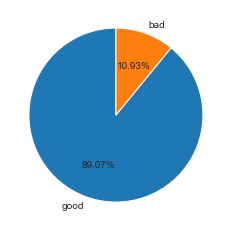

In [13]:
plt.pie(loan_data['good_bad'].value_counts(), autopct='%.2f%%', startangle=90,
       labels=['good','bad'])
plt.show()

In [14]:
len(loan_data.columns)

207

In [15]:
loan_data.shape

(466285, 207)

## Splitting Data
train_test_split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
# loan_data_inputs_train
X_train.shape

(373028, 206)

In [20]:
# loan_data_targets_train
y_train.shape

(373028,)

In [21]:
# loan_data_inputs_test
X_test.shape

(93257, 206)

In [22]:
# # loan_data_targets_test
y_test.shape

(93257,)

## Data Preparation

**GOAL**

- Fine Classing Continuous variables. For Discrete variables don't need fine classing or splitting into categories because they are already categorical by definition
- Getting Weight od Evidence (WoE) & Information Value (IV) 

In [23]:
# rename the data train
df_inputs_prepr = X_train
df_targets_prepr = y_train

#### EXAMPLE

Let's start with a simple variable `grade`. We want to assess its explanatory power with respect to the outcome of interest that is being a good or a bad borrower.

In [24]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)
df1

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0
...,...,...
259178,B,1
365838,B,1
131932,B,1
146867,B,1


In [25]:
df1.groupby('grade', as_index=False).count() 

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [26]:
df1.groupby('grade', as_index=False).sum() 

,grade,good_bad
0,A,57431
1,B,101063
2,C,88794
3,D,52046
4,E,23040
5,F,7944
6,G,1932


In [27]:
df1.groupby('grade', as_index=False).sum()

,grade,good_bad
0,A,57431
1,B,101063
2,C,88794
3,D,52046
4,E,23040
5,F,7944
6,G,1932


In [28]:
df1.groupby('grade', as_index=False).sum()['good_bad'] / df1.groupby('grade', as_index=False).count()['good_bad']

0    0.961044
1    0.921015
2    0.885770
3    0.846304
4    0.805257
5    0.754416
6    0.727958
Name: good_bad, dtype: float64

In [29]:
df1.groupby('grade', as_index=False).mean() 

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [30]:
df1 = pd.merge(df1.groupby('grade', as_index=False).count(), 
               df1.groupby('grade', as_index=False).mean(), on='grade')
df1

,grade,good_bad_x,good_bad_y
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [31]:
df1.columns = ['grade', 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [32]:
df1['prop_bad'] = 1 - df1['prop_good']
df1

,grade,n_obs,prop_good,prop_bad
0,A,59759,0.961044,0.038956
1,B,109730,0.921015,0.078985
2,C,100245,0.885770,0.114230
3,D,61498,0.846304,0.153696
4,E,28612,0.805257,0.194743
5,F,10530,0.754416,0.245584
6,G,2654,0.727958,0.272042


In [33]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()*100 #multiply by 100 to make it percantage
df1

,grade,n_obs,prop_good,prop_bad,prop_n_obs
0,A,59759,0.961044,0.038956,16.019977
1,B,109730,0.921015,0.078985,29.416022
2,C,100245,0.885770,0.114230,26.873318
3,D,61498,0.846304,0.153696,16.486162
4,E,28612,0.805257,0.194743,7.670202
5,F,10530,0.754416,0.245584,2.822844
6,G,2654,0.727958,0.272042,0.711475


In [34]:
df1['n_obs']/df1['n_obs'].sum()*100

0    16.019977
1    29.416022
2    26.873318
3    16.486162
4     7.670202
5     2.822844
6     0.711475
Name: n_obs, dtype: float64

In [35]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = df1['prop_bad'] * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad
0,A,59759,0.961044,0.038956,16.019977,57431.0,2328.0
1,B,109730,0.921015,0.078985,29.416022,101063.0,8667.0
2,C,100245,0.885770,0.114230,26.873318,88794.0,11451.0
3,D,61498,0.846304,0.153696,16.486162,52046.0,9452.0
4,E,28612,0.805257,0.194743,7.670202,23040.0,5572.0
5,F,10530,0.754416,0.245584,2.822844,7944.0,2586.0
6,G,2654,0.727958,0.272042,0.711475,1932.0,722.0


In [36]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()*100 #multiply by 100 to make it percantage
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()*100 #multiply by 100 to make it percantage
df1

,grade,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,0.038956,16.019977,57431.0,2328.0,17.285478,5.708961
1,B,109730,0.921015,0.078985,29.416022,101063.0,8667.0,30.417758,21.254108
2,C,100245,0.885770,0.114230,26.873318,88794.0,11451.0,26.725056,28.081318
3,D,61498,0.846304,0.153696,16.486162,52046.0,9452.0,15.664710,23.179165
4,E,28612,0.805257,0.194743,7.670202,23040.0,5572.0,6.934537,13.664231
5,F,10530,0.754416,0.245584,2.822844,7944.0,2586.0,2.390971,6.341655
6,G,2654,0.727958,0.272042,0.711475,1932.0,722.0,0.581490,1.770563


In [37]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1 = df1.sort_values('WoE')
df1 = df1.reset_index(drop=True)
df1
# In this way we'll see the categories where borrowers have the highest default rate first.

,grade,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,0.272042,0.711475,1932.0,722.0,0.581490,1.770563,-1.113459
1,F,10530,0.754416,0.245584,2.822844,7944.0,2586.0,2.390971,6.341655,-0.975440
2,E,28612,0.805257,0.194743,7.670202,23040.0,5572.0,6.934537,13.664231,-0.678267
3,D,61498,0.846304,0.153696,16.486162,52046.0,9452.0,15.664710,23.179165,-0.391843
4,C,100245,0.885770,0.114230,26.873318,88794.0,11451.0,26.725056,28.081318,-0.049503
5,B,109730,0.921015,0.078985,29.416022,101063.0,8667.0,30.417758,21.254108,0.358476
6,A,59759,0.961044,0.038956,16.019977,57431.0,2328.0,17.285478,5.708961,1.107830


In [38]:
df1['IV'] = df1['WoE'] * (df1['prop_n_good'] - df1['prop_n_bad'])/100 #devided by 100 to keep it in range 0-1
df1['sum_IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,G,2654,0.727958,0.272042,0.711475,1932.0,722.0,0.581490,1.770563,-1.113459,0.013240,0.288636
1,F,10530,0.754416,0.245584,2.822844,7944.0,2586.0,2.390971,6.341655,-0.975440,0.038537,0.288636
2,E,28612,0.805257,0.194743,7.670202,23040.0,5572.0,6.934537,13.664231,-0.678267,0.045645,0.288636
3,D,61498,0.846304,0.153696,16.486162,52046.0,9452.0,15.664710,23.179165,-0.391843,0.029445,0.288636
4,C,100245,0.885770,0.114230,26.873318,88794.0,11451.0,26.725056,28.081318,-0.049503,0.000671,0.288636
5,B,109730,0.921015,0.078985,29.416022,101063.0,8667.0,30.417758,21.254108,0.358476,0.032850,0.288636
6,A,59759,0.961044,0.038956,16.019977,57431.0,2328.0,17.285478,5.708961,1.107830,0.128248,0.288636


`grade` has Information value 0.288636. it means `grade` has moderate predictive powers to the dependent variable (good_bad)

## Preprocessing Discrete Variables: Automating Calculations
Creating Function to simplify the step above & apply it to the all features with deiscrete variable

In [39]:
def Woe_IV_discrete (df_predictor, feature_name, df_target):
    df = pd.concat([df_predictor[feature_name], df_target],axis=1)
    df = pd.merge(df.groupby(feature_name, as_index=False).count(), 
               df.groupby(feature_name, as_index=False).mean(), on=feature_name)
    df.columns = [feature_name, 'n_obs', 'prop_good']
    
    df['prop_bad'] = 1 - df['prop_good']
    
    #prop_n_obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()*100
    
    #n_good & n_bad
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    
    #prop_n_good & prop_n_bad
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()*100
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()*100
    
    #WoE
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values('WoE')
    df = df.reset_index(drop=True)
    
    #IV
    df['IV'] = df['WoE'] * (df['prop_n_good'] - df['prop_n_bad'])/100
    df['sum_IV'] = df['IV'].sum()
    

    
    return df

In [40]:
df_WoE_IV_grade = Woe_IV_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_WoE_IV_grade

,grade,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,G,2654,0.727958,0.272042,0.711475,1932.0,722.0,0.581490,1.770563,-1.113459,0.013240,0.288636
1,F,10530,0.754416,0.245584,2.822844,7944.0,2586.0,2.390971,6.341655,-0.975440,0.038537,0.288636
2,E,28612,0.805257,0.194743,7.670202,23040.0,5572.0,6.934537,13.664231,-0.678267,0.045645,0.288636
3,D,61498,0.846304,0.153696,16.486162,52046.0,9452.0,15.664710,23.179165,-0.391843,0.029445,0.288636
4,C,100245,0.885770,0.114230,26.873318,88794.0,11451.0,26.725056,28.081318,-0.049503,0.000671,0.288636
5,B,109730,0.921015,0.078985,29.416022,101063.0,8667.0,30.417758,21.254108,0.358476,0.032850,0.288636
6,A,59759,0.961044,0.038956,16.019977,57431.0,2328.0,17.285478,5.708961,1.107830,0.128248,0.288636


In [41]:
df_WoE_IV_Home = Woe_IV_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_WoE_IV_Home

,home_ownership,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,OTHER,137,0.795620,0.204380,0.036726,109.0,28.0,0.032807,0.068664,-0.738602,0.000265,inf
1,NONE,40,0.850000,0.150000,0.010723,34.0,6.0,0.010233,0.014714,-0.363144,0.000016,inf
2,RENT,150599,0.873870,0.126130,40.372036,131604.0,18995.0,39.609932,46.581490,-0.162123,0.011303,inf
3,OWN,33295,0.892536,0.107464,8.925603,29717.0,3578.0,8.944169,8.774339,0.019170,0.000033,inf
4,MORTGAGE,188956,0.903835,0.096165,50.654643,170785.0,18171.0,51.402558,44.560793,0.142834,0.009772,inf
5,ANY,1,1.000000,0.000000,0.000268,1.0,0.0,0.000301,0.000000,inf,inf,inf


In [42]:
df_WoE_IV_VerifStat = Woe_IV_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_WoE_IV_VerifStat

,verification_status,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,Verified,134414,0.872781,0.127219,36.033220,117314.0,17100.0,35.308954,41.934376,-0.171969,0.011394,0.020384
1,Source Verified,120030,0.895918,0.104082,32.177209,107537.0,12493.0,32.366290,30.636618,0.054922,0.000950,0.020384
2,Not Verified,118584,0.905679,0.094321,31.789571,107399.0,11185.0,32.324755,27.429006,0.164232,0.008040,0.020384


In [43]:
df_WoE_IV_purpose = Woe_IV_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_WoE_IV_purpose

,purpose,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,small_business,5582,0.786098,0.213902,1.496402,4388.0,1194.0,1.320692,2.928049,-0.796180,0.012797,0.035418
1,educational,333,0.801802,0.198198,0.089269,267.0,66.0,0.080361,0.161852,-0.700151,0.000571,0.035418
2,moving,2392,0.839465,0.160535,0.641239,2008.0,384.0,0.604364,0.941684,-0.443493,0.001496,0.035418
3,house,1830,0.860109,0.139891,0.490580,1574.0,256.0,0.473740,0.627789,-0.281547,0.000434,0.035418
4,other,18884,0.862264,0.137736,5.062355,16283.0,2601.0,4.900828,6.378439,-0.263519,0.003894,0.035418
5,renewable_energy,281,0.864769,0.135231,0.075329,243.0,38.0,0.073138,0.093188,-0.242270,0.000049,0.035418
6,medical,3684,0.868350,0.131650,0.987593,3199.0,485.0,0.962829,1.189367,-0.211300,0.000479,0.035418
7,wedding,1887,0.881823,0.118177,0.505860,1664.0,223.0,0.500828,0.546864,-0.087937,0.000040,0.035418
8,vacation,1991,0.882471,0.117529,0.533740,1757.0,234.0,0.528819,0.573839,-0.081703,0.000037,0.035418
9,debt_consolidation,219183,0.886884,0.113116,58.757788,194390.0,24793.0,58.507148,60.799941,-0.038440,0.000881,0.035418


In [44]:
df_WoE_IV_addrState = Woe_IV_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_WoE_IV_addrState

,addr_state,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,NE,13,0.461538,0.538462,0.003485,6.0,7.0,0.001806,0.017166,-2.251896,3.458968e-04,inf
1,IA,13,0.769231,0.230769,0.003485,10.0,3.0,0.003010,0.007357,-0.893772,3.885341e-05,inf
2,NV,5221,0.864585,0.135415,1.399627,4514.0,707.0,1.358616,1.733778,-0.243837,9.147838e-04,inf
3,FL,25211,0.875808,0.124192,6.758474,22080.0,3131.0,6.645598,7.678160,-0.144425,1.491279e-03,inf
4,HI,2001,0.877061,0.122939,0.536421,1755.0,246.0,0.528217,0.603266,-0.132852,9.970539e-05,inf
5,AL,4671,0.877328,0.122672,1.252185,4098.0,573.0,1.233409,1.405169,-0.130376,2.239356e-04,inf
6,NM,2075,0.883373,0.116627,0.556259,1833.0,242.0,0.551693,0.593457,-0.072973,3.047682e-05,inf
7,VA,11366,0.883864,0.116136,3.046956,10046.0,1320.0,3.023627,3.237040,-0.068202,1.455522e-04,inf
8,NY,32211,0.883984,0.116016,8.635009,28474.0,3737.0,8.570053,9.164255,-0.067037,3.983340e-04,inf
9,OK,3284,0.884287,0.115713,0.880363,2904.0,380.0,0.874041,0.931875,-0.064072,3.705557e-05,inf


In [45]:
df_WoE_IV_initListStat = Woe_IV_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_WoE_IV_initListStat

,initial_list_status,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,f,242514,0.879694,0.120306,65.012278,213338.0,29176.0,64.210083,71.548384,-0.108214,0.007941,0.02478
1,w,130514,0.911105,0.088895,34.987722,118912.0,11602.0,35.789917,28.451616,0.229461,0.016839,0.02478


## Preprocessing Discrete Variables: Visualizing Results

For these dummy variables, we always keep the category with the worst credit risk as a reference category.

In [46]:
def plot_by_woe(func_WoE_IV, rotation_of_x_axis_labels = 0):
    #create df variable for func_IV into 
    df_plot = func_WoE_IV
    
    #plotting
    plt.figure(figsize=(16,6))
    plt.title(f'Weight of Evidence by "{df_plot.columns[0]}"',size=14, fontweight='bold')
    x = np.array(df_plot.iloc[:, 0].apply(str))
    y = df_plot['WoE']
    plt.plot(x, y, '--o')
    plt.xlabel(df_plot.columns[0], size=12)
    plt.ylabel('Weight of Evidence', size=12)
    plt.xticks(rotation = rotation_of_x_axis_labels)
    plt.show()

### `grade`

In [47]:
df_WoE_IV_grade

,grade,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,G,2654,0.727958,0.272042,0.711475,1932.0,722.0,0.581490,1.770563,-1.113459,0.013240,0.288636
1,F,10530,0.754416,0.245584,2.822844,7944.0,2586.0,2.390971,6.341655,-0.975440,0.038537,0.288636
2,E,28612,0.805257,0.194743,7.670202,23040.0,5572.0,6.934537,13.664231,-0.678267,0.045645,0.288636
3,D,61498,0.846304,0.153696,16.486162,52046.0,9452.0,15.664710,23.179165,-0.391843,0.029445,0.288636
4,C,100245,0.885770,0.114230,26.873318,88794.0,11451.0,26.725056,28.081318,-0.049503,0.000671,0.288636
5,B,109730,0.921015,0.078985,29.416022,101063.0,8667.0,30.417758,21.254108,0.358476,0.032850,0.288636
6,A,59759,0.961044,0.038956,16.019977,57431.0,2328.0,17.285478,5.708961,1.107830,0.128248,0.288636


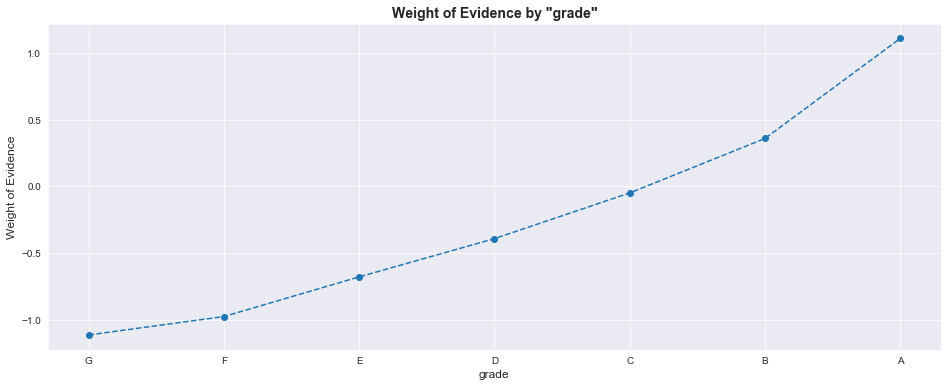

In [48]:
plot_by_woe(Woe_IV_discrete(df_inputs_prepr, 'grade', df_targets_prepr),0)

grade:G as reference category

### `home_ownership`

In [49]:
df_WoE_IV_Home

,home_ownership,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,OTHER,137,0.795620,0.204380,0.036726,109.0,28.0,0.032807,0.068664,-0.738602,0.000265,inf
1,NONE,40,0.850000,0.150000,0.010723,34.0,6.0,0.010233,0.014714,-0.363144,0.000016,inf
2,RENT,150599,0.873870,0.126130,40.372036,131604.0,18995.0,39.609932,46.581490,-0.162123,0.011303,inf
3,OWN,33295,0.892536,0.107464,8.925603,29717.0,3578.0,8.944169,8.774339,0.019170,0.000033,inf
4,MORTGAGE,188956,0.903835,0.096165,50.654643,170785.0,18171.0,51.402558,44.560793,0.142834,0.009772,inf
5,ANY,1,1.000000,0.000000,0.000268,1.0,0.0,0.000301,0.000000,inf,inf,inf


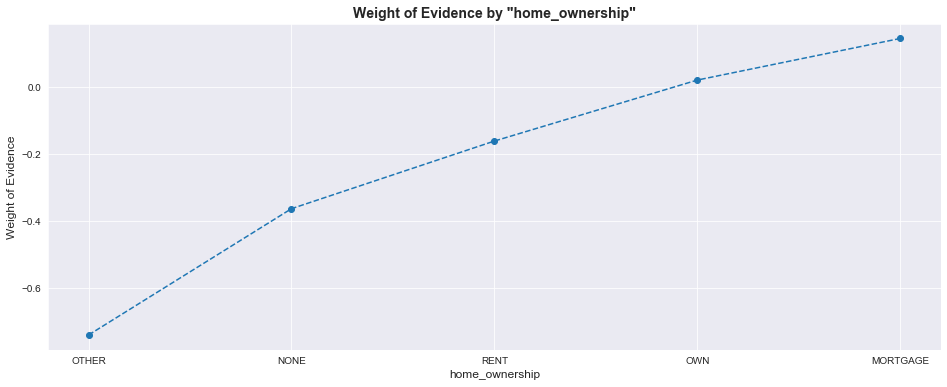

In [50]:
plot_by_woe(df_WoE_IV_Home,0)

- Categories OTHER & NONE are as associated with highest probability of deafault
- But these 2 categories had very low number of observation. the proportion is less than 0.1% each.
- WoE could not be calculated for Category ANY because there is only one observation with this home ownership status.
- It really doesn't make sense to have dummy variables for these categories so we don't want to have dummies for them but we don't want to remove them either because that would imply losing the information about these customers.
- In Such cases, we combine underrepresented categories that are similar to them.
- Combine OTHER, NONE, ANY with the riskiest category with enough number of observations wich is category RENT. 
    - RENT has similar/closer WOE to OTHER & NONE (negative value of WoE) and has good amount number of observation

In [51]:
df_inputs_prepr['home_ownership:RENT'].sum()

150599

In [52]:
sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER']]).sum()

150736

In [53]:
# Combine RENT, OTHER, NONE, ANY
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], 
                                                             df_inputs_prepr['home_ownership:OTHER'],
                                                             df_inputs_prepr['home_ownership:NONE'],
                                                             df_inputs_prepr['home_ownership:ANY']])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [54]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'].value_counts()

0    222251
1    150777
Name: home_ownership:RENT_OTHER_NONE_ANY, dtype: int64

Reference Category : 'home_ownership:RENT_OTHER_NONE_ANY'

### `addr_state`

In [55]:
df_WoE_IV_addrState

,addr_state,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,NE,13,0.461538,0.538462,0.003485,6.0,7.0,0.001806,0.017166,-2.251896,3.458968e-04,inf
1,IA,13,0.769231,0.230769,0.003485,10.0,3.0,0.003010,0.007357,-0.893772,3.885341e-05,inf
2,NV,5221,0.864585,0.135415,1.399627,4514.0,707.0,1.358616,1.733778,-0.243837,9.147838e-04,inf
3,FL,25211,0.875808,0.124192,6.758474,22080.0,3131.0,6.645598,7.678160,-0.144425,1.491279e-03,inf
4,HI,2001,0.877061,0.122939,0.536421,1755.0,246.0,0.528217,0.603266,-0.132852,9.970539e-05,inf
5,AL,4671,0.877328,0.122672,1.252185,4098.0,573.0,1.233409,1.405169,-0.130376,2.239356e-04,inf
6,NM,2075,0.883373,0.116627,0.556259,1833.0,242.0,0.551693,0.593457,-0.072973,3.047682e-05,inf
7,VA,11366,0.883864,0.116136,3.046956,10046.0,1320.0,3.023627,3.237040,-0.068202,1.455522e-04,inf
8,NY,32211,0.883984,0.116016,8.635009,28474.0,3737.0,8.570053,9.164255,-0.067037,3.983340e-04,inf
9,OK,3284,0.884287,0.115713,0.880363,2904.0,380.0,0.874041,0.931875,-0.064072,3.705557e-05,inf


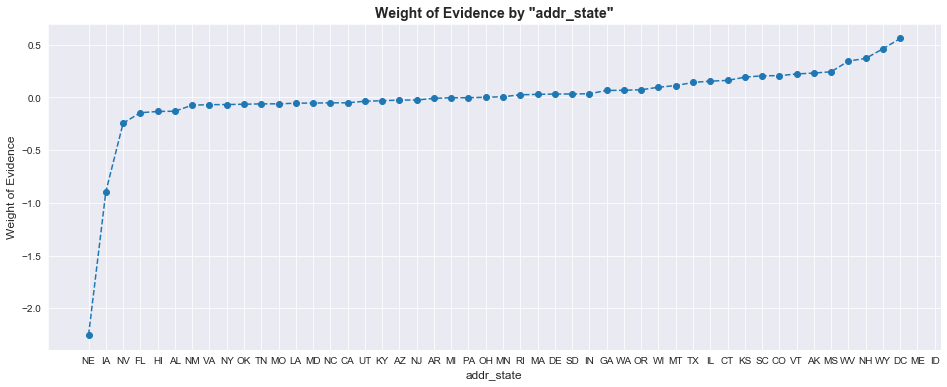

In [56]:
plot_by_woe(df_WoE_IV_addrState,0)

There are no borrowers in our dataset from one of the sates : North Dakota (ND)

In [57]:
# Create categories for ND just incase there are some borrower in the future
# We dont have any info/data for ND, thus we assume it as high risk. finally impute as default(0)
if 'addr_state:ND' in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
df_inputs_prepr['addr_state:ND']

427211    0
206088    0
136020    0
412305    0
36159     0
         ..
259178    0
365838    0
131932    0
146867    0
121958    0
Name: addr_state:ND, Length: 373028, dtype: int64

- NE & IA have extreme low WoE & low number of observation, thus we will make combine them into same category/dummy
- ME & ID have extrem high WoE, probably it caused by very low number of observation, thus we will keep it mind later.

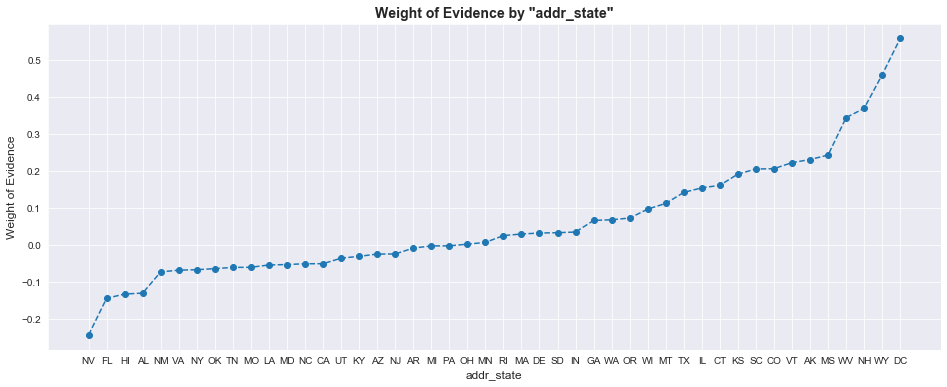

In [59]:
#lets see the plot without NE, IA, ME, ID
plot_by_woe(df_WoE_IV_addrState.iloc[2:-2, : ])

- Now we get different perspective from this plot(without NE, IA, ME, ID) compare to plot before.
- NV has lowest WoE
- FL, HI, AL have low & quiet similar WoE --> probably we'll make it on 1 category (dummy)

- Remember NE & IA have low WoE also & have low number of observation
- we have no Information about ND. in term of risk management, we consider ND as a high risk (low WoE-->higher probability to deafult)



<b>In Conclusion we'll keep 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL' in one category/dummy</b>

- 'WV' 'NH' 'WY' 'DC' have high & quiet similar WoE
- Remember ME, ID have very high WoE & low number of Observation

<b>In Conclusion we'll keep 'WV' 'NH' 'WY' 'DC' 'ME 'ID' in one category/dummy</b>

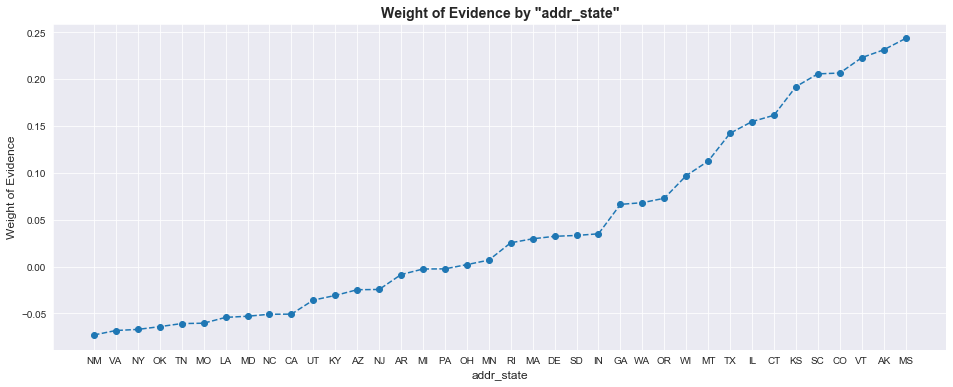

In [60]:
#lets see the plot without 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL' &  'WV' 'NH' 'WY' 'DC' 'ME 'ID'
plot_by_woe(df_WoE_IV_addrState.iloc[6:-6, : ])

- 'NM' to 'CA' have low WoE. it seems that we can make it into 1 category. but before we do that. lets see the number of observation for each of it
- 'NY' & 'CA' stands out with high number of borrowers / high number of observation. thus we'll leave it by itself

<b> So the group of category should be:
    1. 'NM' 'VA'
    2. 'NY'
    3. 'OK 'TN' 'MO' 'LA' 'MD' 'NC'
    4. 'CA'
</b> 


- For the next group / category we'll do the same step as before

<b> So the group of category should be:
    1. 'UT' 'KY' 'AZ' 'NJ'
    2. 'AR' 'MI' 'PA' 'OH' 'MN'
    3. 'RI' 'MA' 'DE' 'SD' 'IN'
    4. 'GA' 'WA' 'OR'
    5. 'WI' 'MT'
    6. 'TX'
    7. 'IL' 'CT'
    8. 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
</b> 

In [61]:
# Group of state with LOWEST WoE / Highest Probability to Default 
# Reference Category
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

# Group of state with HIGHEST WoE / Lowest Probability to Default 
df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

############################################################################################################################

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Reference Category 'addr_state:ND_NE_IA_NV_FL_HI_AL'

### `verification_status`

In [62]:
df_WoE_IV_VerifStat

,verification_status,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,Verified,134414,0.872781,0.127219,36.033220,117314.0,17100.0,35.308954,41.934376,-0.171969,0.011394,0.020384
1,Source Verified,120030,0.895918,0.104082,32.177209,107537.0,12493.0,32.366290,30.636618,0.054922,0.000950,0.020384
2,Not Verified,118584,0.905679,0.094321,31.789571,107399.0,11185.0,32.324755,27.429006,0.164232,0.008040,0.020384


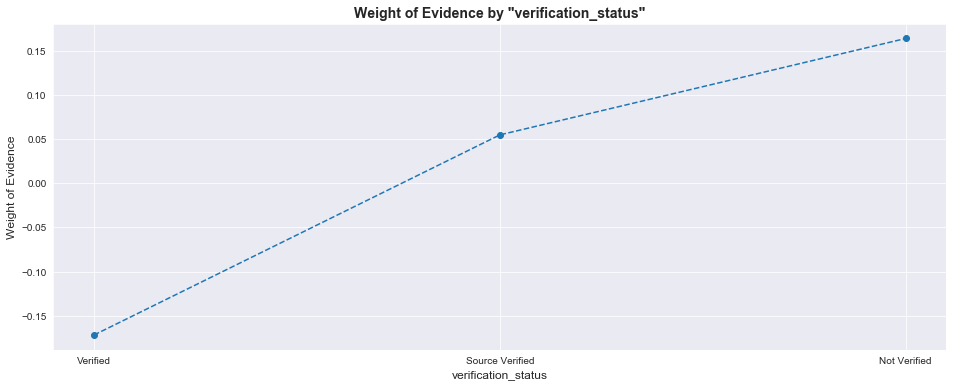

In [63]:
plot_by_woe(df_WoE_IV_VerifStat,0)

verification_status:Verified = Reference Category

###  `purpose`

In [64]:
df_WoE_IV_purpose

,purpose,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,small_business,5582,0.786098,0.213902,1.496402,4388.0,1194.0,1.320692,2.928049,-0.796180,0.012797,0.035418
1,educational,333,0.801802,0.198198,0.089269,267.0,66.0,0.080361,0.161852,-0.700151,0.000571,0.035418
2,moving,2392,0.839465,0.160535,0.641239,2008.0,384.0,0.604364,0.941684,-0.443493,0.001496,0.035418
3,house,1830,0.860109,0.139891,0.490580,1574.0,256.0,0.473740,0.627789,-0.281547,0.000434,0.035418
4,other,18884,0.862264,0.137736,5.062355,16283.0,2601.0,4.900828,6.378439,-0.263519,0.003894,0.035418
5,renewable_energy,281,0.864769,0.135231,0.075329,243.0,38.0,0.073138,0.093188,-0.242270,0.000049,0.035418
6,medical,3684,0.868350,0.131650,0.987593,3199.0,485.0,0.962829,1.189367,-0.211300,0.000479,0.035418
7,wedding,1887,0.881823,0.118177,0.505860,1664.0,223.0,0.500828,0.546864,-0.087937,0.000040,0.035418
8,vacation,1991,0.882471,0.117529,0.533740,1757.0,234.0,0.528819,0.573839,-0.081703,0.000037,0.035418
9,debt_consolidation,219183,0.886884,0.113116,58.757788,194390.0,24793.0,58.507148,60.799941,-0.038440,0.000881,0.035418


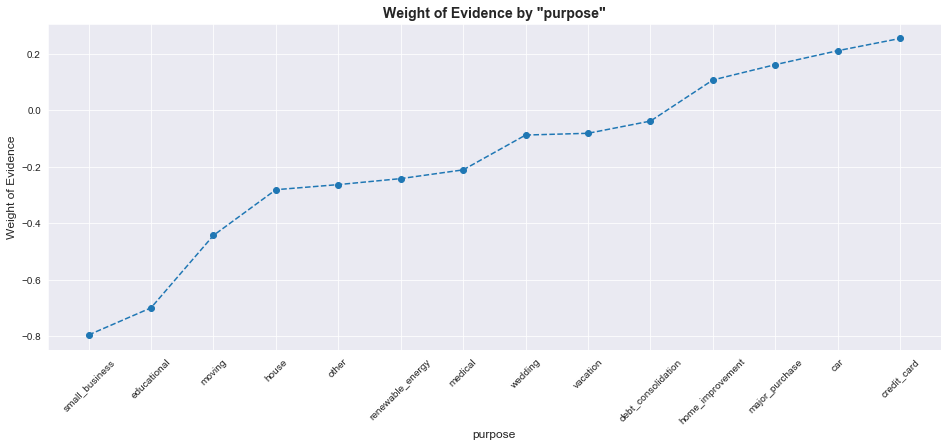

In [65]:
plot_by_woe(df_WoE_IV_purpose, 45)

- We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.

- We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.

- We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.

- We leave 'debt_consolidtion' in a separate category.

- We leave 'credit_card' in a separate category.

- **'educ__sm_b__wedd__ren_en__mov__house' will be the reference category**.

In [66]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], 
                                                                       df_inputs_prepr['purpose:small_business'],
                                                                       df_inputs_prepr['purpose:wedding'], 
                                                                       df_inputs_prepr['purpose:renewable_energy'],
                                                                       df_inputs_prepr['purpose:moving'], 
                                                                       df_inputs_prepr['purpose:house']])

df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], 
                                                     df_inputs_prepr['purpose:medical'],
                                                     df_inputs_prepr['purpose:vacation']])

df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], 
                                                              df_inputs_prepr['purpose:car'],
                                                              df_inputs_prepr['purpose:home_improvement']])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

### `initial_list_status`

In [67]:
df_WoE_IV_initListStat

,initial_list_status,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,f,242514,0.879694,0.120306,65.012278,213338.0,29176.0,64.210083,71.548384,-0.108214,0.007941,0.02478
1,w,130514,0.911105,0.088895,34.987722,118912.0,11602.0,35.789917,28.451616,0.229461,0.016839,0.02478


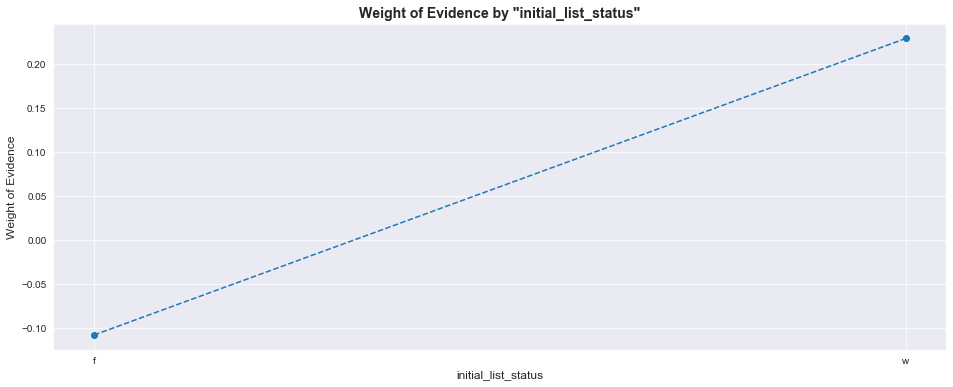

In [68]:
plot_by_woe(df_WoE_IV_initListStat,0)

initial_list_status:f = Reference Category

## Preprocessing Continuous Variables

### Automating Calculations and Visualizing Results

In [69]:
def Woe_IV_continuous (df_predictor, feature_name, df_target):
    df = pd.concat([df_predictor[feature_name], df_target],axis=1)
    df = pd.merge(df.groupby(feature_name, as_index=False).count(), 
               df.groupby(feature_name, as_index=False).mean(), on=feature_name)
    df.columns = [feature_name, 'n_obs', 'prop_good']
    
    df['prop_bad'] = 1 - df['prop_good']
    
    #prop_n_obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()*100
    
    #n_good & n_bad
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    
    #prop_n_good & prop_n_bad
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()*100
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()*100
    
    #WoE
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
#     df = df.sort_values('WoE')
#     df = df.reset_index(drop=True)
    
    #IV
    df['IV'] = df['WoE'] * (df['prop_n_good'] - df['prop_n_bad'])/100
    df['sum_IV'] = df['IV'].sum()
    

    
    return df

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

### `term_int`

In [70]:
df_inputs_prepr['term_int'].unique()

array([36, 60], dtype=int64)

In [71]:
df_Con_Woe_IV_term = Woe_IV_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_Con_Woe_IV_term

,term_int,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,36,270419,0.902995,0.097005,72.49295,244187.0,26232.0,73.494959,64.328805,0.133209,0.012210,0.039434
1,60,102609,0.858239,0.141761,27.50705,88063.0,14546.0,26.505041,35.671195,-0.297009,0.027224,0.039434


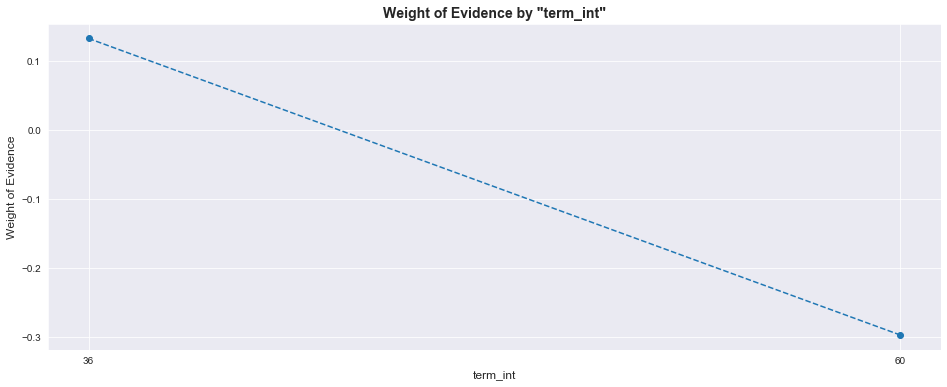

In [72]:
plot_by_woe(df_Con_Woe_IV_term,0)

In [73]:
#create dummy
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### `emp_length_int`

In [74]:
df_inputs_prepr['emp_length_int'].unique()

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [75]:
df_Con_Woe_IV_emp_len = Woe_IV_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_Con_Woe_IV_emp_len

,emp_length_int,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,0.0,45720,0.876400,0.123600,12.256453,40069.0,5651.0,12.059895,13.857963,-0.138975,2.498857e-03,0.006506
1,1.0,23654,0.886996,0.113004,6.341079,20981.0,2673.0,6.314823,6.555005,-0.037329,8.965789e-05,0.006506
2,2.0,33078,0.890955,0.109045,8.867431,29471.0,3607.0,8.870128,8.845456,0.002785,6.872024e-07,0.006506
3,3.0,29205,0.890772,0.109228,7.829171,26015.0,3190.0,7.829947,7.822846,0.000907,6.444066e-08,0.006506
4,4.0,22468,0.890644,0.109356,6.023140,20011.0,2457.0,6.022874,6.025308,-0.000404,9.829773e-09,0.006506
5,5.0,24602,0.884725,0.115275,6.595215,21766.0,2836.0,6.551091,6.954730,-0.059790,2.413379e-04,0.006506
6,6.0,20887,0.883899,0.116101,5.599312,18462.0,2425.0,5.556659,5.946834,-0.067862,2.647803e-04,0.006506
7,7.0,21049,0.887453,0.112547,5.642740,18680.0,2369.0,5.622272,5.809505,-0.032759,6.133645e-05,0.006506
8,8.0,17853,0.889878,0.110122,4.785968,15887.0,1966.0,4.781640,4.821227,-0.008245,3.263866e-06,0.006506
9,9.0,14267,0.886662,0.113338,3.824646,12650.0,1617.0,3.807374,3.965373,-0.040660,6.424315e-05,0.006506


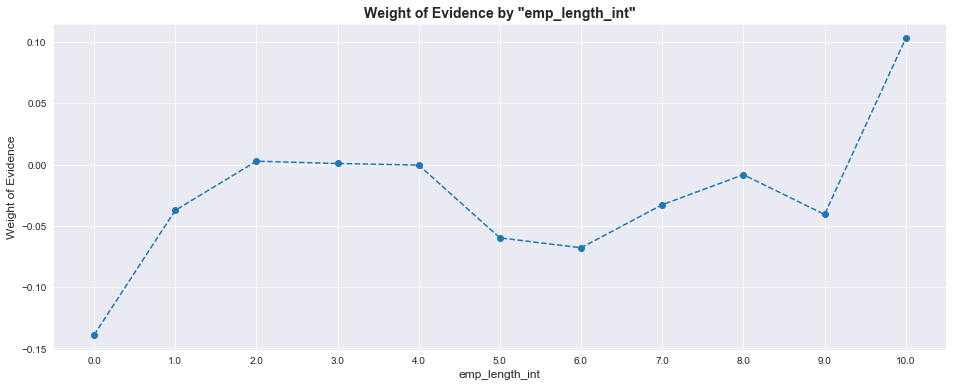

In [76]:
plot_by_woe(df_Con_Woe_IV_emp_len)

We'll do coarse classing like we did it before on `addr_state` variable.

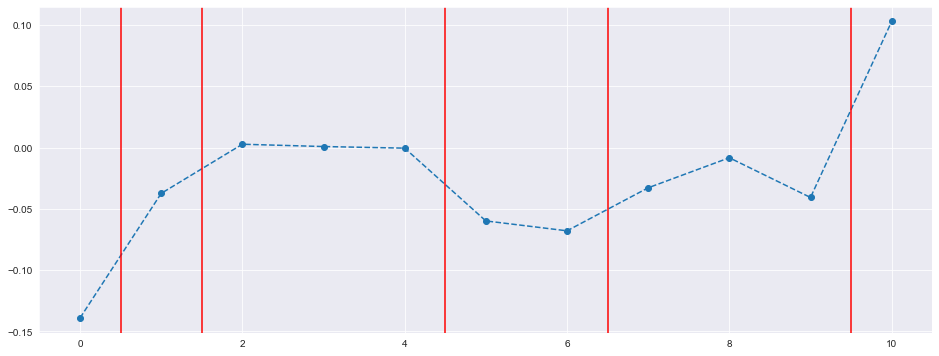

In [77]:
data = df_Con_Woe_IV_emp_len
plt.figure(figsize=(16,6))
plt.plot(data['emp_length_int'], data['WoE'], '--o')
plt.axvline([0.5], color='red') # 0
plt.axvline([1.5], color='red') # 1
plt.axvline([4.5], color='red') # 2-4
plt.axvline([6.5], color='red') # 5-6
plt.axvline([9.5], color='red') # 7-9
# plt.axvline([10.3], color='red') # 10
plt.show()

emp_length:0 = Reference Category

In [78]:
# Create dummy
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [79]:
len(df_inputs_prepr.columns)

230

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

### `mths_since_issue_d`

In [80]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [81]:
df_inputs_prepr['mths_since_issue_d'].nunique()

91

In [82]:
df_inputs_prepr['mths_since_issue_d'].describe()

count    373028.000000
mean         51.259637
std          14.347532
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [83]:
# FINE CLASSING: using the 'cut' method, we split the variable into 50 categories by its values
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
df_inputs_prepr['mths_since_issue_d_factor']
# The value of interval
# e.g : 43.2, 45.0 --> Greater than 43.2, Less than or Equal to 45.0

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [85]:
df_Con_Woe_IV_Issue_date = Woe_IV_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_Con_Woe_IV_Issue_date

,mths_since_issue_d_factor,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,"(35.91, 37.8]",28170,0.942244,0.057756,7.551712,26543.0,1627.0,7.988864,3.989897,0.694283,2.776416e-02,0.113186
1,"(37.8, 39.6]",39636,0.928424,0.071576,10.625476,36799.0,2837.0,11.075696,6.957183,0.464979,1.915020e-02,0.113186
2,"(39.6, 41.4]",38614,0.917284,0.082716,10.351502,35420.0,3194.0,10.660647,7.832655,0.308258,8.717501e-03,0.113186
3,"(41.4, 43.2]",29038,0.908603,0.091397,7.784402,26384.0,2654.0,7.941008,6.508411,0.198945,2.850078e-03,0.113186
4,"(43.2, 45.0]",28367,0.901787,0.098213,7.604523,25581.0,2786.0,7.699323,6.832115,0.119498,1.036296e-03,0.113186
5,"(45.0, 46.8]",12165,0.899301,0.100699,3.261149,10940.0,1225.0,3.292701,3.004071,0.091740,2.647895e-04,0.113186
6,"(46.8, 48.6]",24451,0.898900,0.101100,6.554736,21979.0,2472.0,6.615199,6.062092,0.087315,4.829451e-04,0.113186
7,"(48.6, 50.4]",22969,0.888328,0.111672,6.157447,20404.0,2565.0,6.141159,6.290156,-0.023972,3.571847e-05,0.113186
8,"(50.4, 52.2]",20640,0.880523,0.119477,5.533097,18174.0,2466.0,5.469977,6.047378,-0.100350,5.794242e-04,0.113186
9,"(52.2, 54.0]",18312,0.866863,0.133137,4.909015,15874.0,2438.0,4.777728,5.978714,-0.224240,2.693097e-03,0.113186


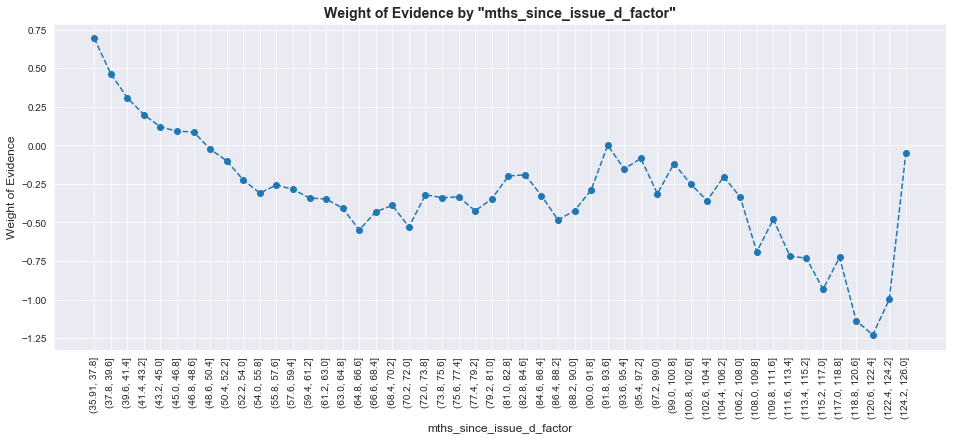

In [86]:
plot_by_woe(df_Con_Woe_IV_Issue_date,90)

First 3 Category of `mths_since_issue_d_factor` has high or distinctive WoE compare to the rest of it. Thus we'll keep it as it is and see the other category except these values.

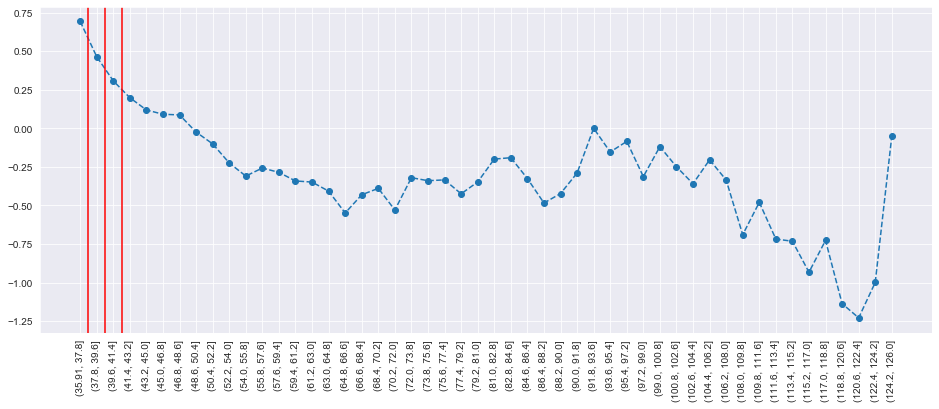

In [87]:
data = df_Con_Woe_IV_Issue_date
plt.figure(figsize=(16,6))
plt.plot(np.array(data['mths_since_issue_d_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([0.5], color='red')
plt.axvline([1.5], color='red')
plt.axvline([2.5], color='red')
plt.show()

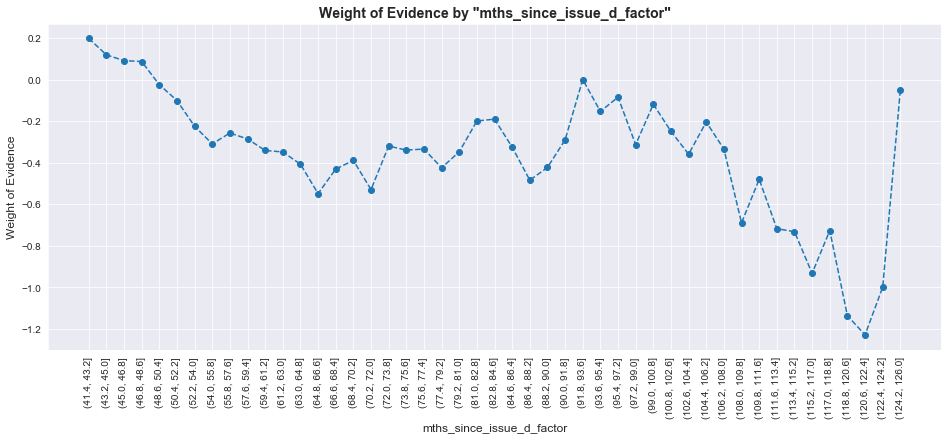

In [88]:
plot_by_woe(df_Con_Woe_IV_Issue_date.iloc[3:,:],90)

Important determinant was the number of observations that fall into a given category. If we check out the remaining categories we can notice that they contain a very small number of observations altogether.


In fact this is the reason why their weights of evidence vary a lot. So even if you have forgotten to check the number of observations that fall into each category such a plot can serve as a red flag.


Whenever you see a WoE plot that goes up and down like this (`mnths_since_issue_d_factor` > 65) we must make sure to check the number of observations in the respective categories.

OK so we know that these intervals (`mnths_since_issue_d_factor` > 65) refer to only a small portion of our data. Therefore we can create only one dummy variable for all of them. But alternatively we prefer to make (64.8-66.6) - (82.8-84.6) as one category & (84.6-86.4)-(124.2-126.0) as another one.

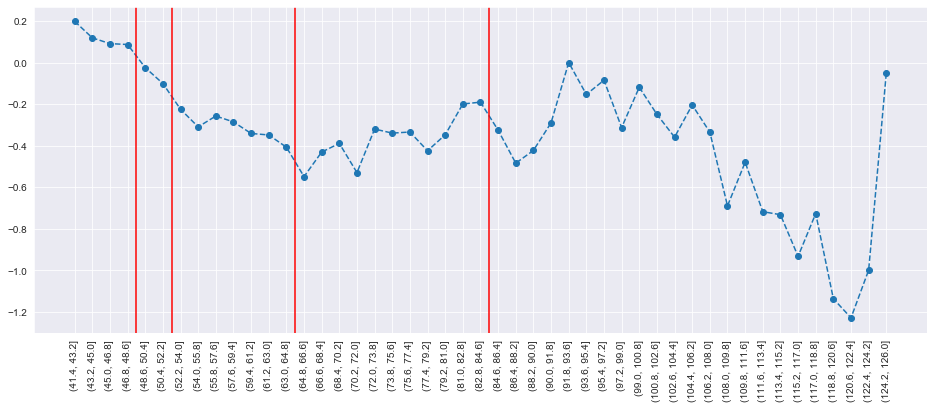

In [89]:
data = df_Con_Woe_IV_Issue_date.iloc[3:,:]
plt.figure(figsize=(16,6))
plt.plot(np.array(data['mths_since_issue_d_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([3.5], color='red')
plt.axvline([5.5], color='red')
plt.axvline([12.5], color='red')
plt.axvline([23.5], color='red')
plt.show()

In [90]:
# We create the following categories:
# < 38
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
#38 - 39
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
#40 - 41
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)


#42 - 48
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
#49 - 52
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
#53 - 64
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
#65 - 84
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
#> 84
df_inputs_prepr['mths_since_issue_d:>84'] = np.where((df_inputs_prepr['mths_since_issue_d']>84), 1, 0)
# df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

## `int_rate`

In [91]:
df_inputs_prepr['int_rate'].unique()

array([ 8.9 , 14.33, 16.59, 12.84,  7.49, 10.62, 20.31,  9.17, 15.31,
       16.49,  9.67, 15.8 , 13.65, 14.64, 22.15, 12.49, 10.15, 18.55,
       11.14, 10.64, 15.1 , 16.29, 17.57, 13.67, 11.99, 16.2 , 15.61,
       16.99,  7.12, 12.99, 12.12, 16.78, 11.67, 13.35,  7.51, 18.25,
       10.59, 13.99, 23.1 ,  6.03, 14.16, 13.11, 20.99, 22.2 , 10.99,
       18.85, 19.52, 23.83, 22.45,  7.69, 20.2 ,  6.62, 11.86, 14.09,
       18.49,  9.99,  7.9 , 14.3 , 13.98,  7.62, 21.  , 16.89, 17.19,
       11.55, 16.07, 10.65, 18.75, 18.92, 14.49, 17.14,  8.49, 13.61,
        6.49, 15.59,  9.71, 18.64, 17.27, 12.69, 14.72, 23.7 , 10.37,
        6.92, 10.95, 10.36, 12.35, 19.91, 12.53, 25.8 , 17.77, 11.44,
       17.76, 24.08, 19.2 , 17.56, 19.99,  8.39, 10.16, 18.99,  9.76,
       22.47, 14.99, 13.05,  6.17, 17.1 , 11.11, 18.54, 13.66, 14.31,
       11.71, 20.5 , 14.47, 14.98, 19.72, 13.49,  7.88, 14.65, 15.22,
       13.48, 14.54, 17.99,  6.54, 21.18, 11.12, 12.85, 14.82, 23.43,
       13.43, 16.24,

In [92]:
df_inputs_prepr['int_rate'].nunique()

504

In [93]:
#FINE CLASSING
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
df_inputs_prepr['int_rate_factor']

427211      (8.722, 9.135]
206088    (14.089, 14.502]
136020      (8.722, 9.135]
412305    (16.566, 16.978]
36159      (12.438, 12.85]
                ...       
259178       (8.31, 8.722]
365838     (12.438, 12.85]
131932    (14.089, 14.502]
146867    (10.786, 11.199]
121958    (11.199, 11.612]
Name: int_rate_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [95]:
df_Con_Woe_IV_int_rate = Woe_IV_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_Con_Woe_IV_int_rate

,int_rate_factor,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,"(5.399, 5.833]",785,0.961783,0.038217,0.210440,755.0,30.0,0.227239,0.073569,1.127775,0.001733,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.019624,2.267658,8293.0,166.0,2.496012,0.407082,1.813434,0.037881,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.028495,2.097966,7603.0,223.0,2.288337,0.546864,1.431381,0.024927,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.026982,0.486827,1767.0,49.0,0.531828,0.120163,1.487473,0.006123,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.023544,0.842564,3069.0,74.0,0.923702,0.181470,1.627297,0.012078,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.037676,3.372669,12107.0,474.0,3.643943,1.162391,1.142587,0.028354,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.050686,2.596856,9196.0,491.0,2.767795,1.204081,0.832335,0.013015,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.034729,1.767696,6365.0,229.0,1.915726,0.561577,1.227103,0.016617,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.062585,2.557181,8942.0,597.0,2.691347,1.464025,0.608852,0.007473,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.036072,1.791018,6440.0,241.0,1.938299,0.591005,1.187742,0.016002,0.343349


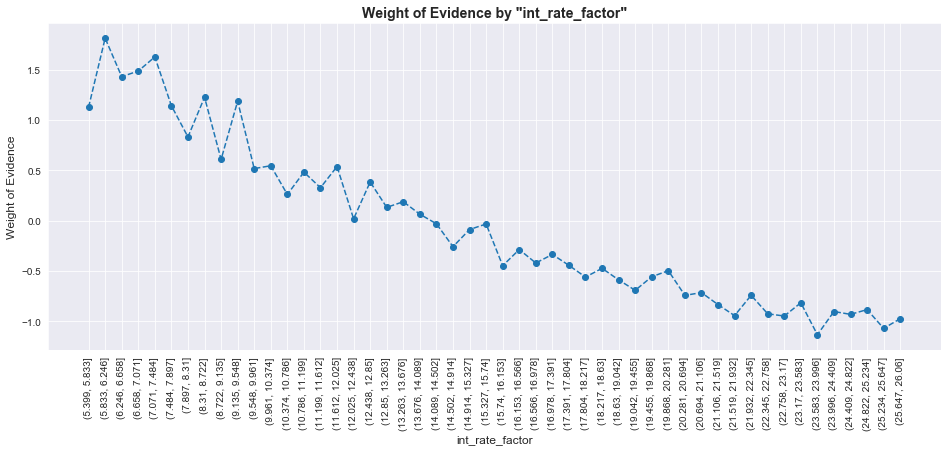

In [96]:
plot_by_woe(df_Con_Woe_IV_int_rate,90)

- The Graph show Monotonic Relationship. 
    - A monotonic relationship is a relationship that does one of the following: 
            (1) as the value of one variable increases, so does the value of the other variable; or 
            (2) as the value of one variable increases, the other variable value decreases.
- The Greate the Interest Rate the Lower the Weight of evidence (Monotonic relationship type 2) = <b>the higher the interest rate give higher probability of Deafault (Monotonic relationship type 2)</b>

1.  The first 10 interval of interest rate have relativly high WoE, but have low Number of Observation. Bundled them in  one category / dummy (5.399 - 9.548) **Greter than 5.399 and Less tha or Equal to 9.548**
2. interval betwwen (9.548 - 12.025) have realativly same WoE,  Bundled them in  one category / dummy.
3. 12.025 - 15.74
4. 15.74 - 20.281
5. value grater than 20.281

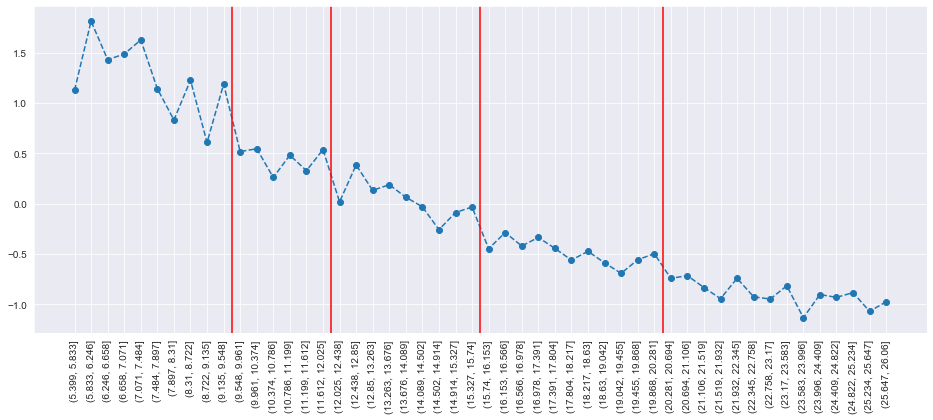

In [97]:
data = df_Con_Woe_IV_int_rate
plt.figure(figsize=(16,6))
plt.plot(np.array(data['int_rate_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([9.5], color='red')
plt.axvline([15.5], color='red')
plt.axvline([24.5], color='red')
plt.axvline([35.5], color='red')
plt.show()

In [98]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

## `funded_amnt`

In [99]:
df_inputs_prepr['funded_amnt'].unique()

array([24000, 10000, 20425, ..., 34650, 32775,   950], dtype=int64)

In [100]:
df_inputs_prepr['funded_amnt'].nunique()

1344

In [101]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df_inputs_prepr['funded_amnt_factor']

427211    (23960.0, 24650.0]
206088     (9470.0, 10160.0]
136020    (19820.0, 20510.0]
412305    (17060.0, 17750.0]
36159       (8090.0, 8780.0]
                 ...        
259178      (4640.0, 5330.0]
365838    (19820.0, 20510.0]
131932    (19130.0, 19820.0]
146867    (14990.0, 15680.0]
121958    (13610.0, 14300.0]
Name: funded_amnt_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(465.5, 1190.0] < (1190.0, 1880.0] < (1880.0, 2570.0] < (2570.0, 3260.0] ... (32240.0, 32930.0] < (32930.0, 33620.0] < (33620.0, 34310.0] < (34310.0, 35000.0]]

In [103]:
df_Con_Woe_IV_funded_amnt= Woe_IV_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_Con_Woe_IV_funded_amnt

,funded_amnt_factor,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,"(465.5, 1190.0]",1224,0.905229,0.094771,0.328126,1108.0,116.0,0.333484,0.284467,0.158977,7.792514e-05,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.096103,0.811735,2737.0,291.0,0.823777,0.713620,0.143549,1.581301e-04,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.106181,1.613284,5379.0,639.0,1.618962,1.567021,0.032608,1.693683e-05,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.110927,1.943018,6444.0,804.0,1.939503,1.971651,-0.016440,5.284970e-06,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.108398,1.273631,4236.0,515.0,1.274944,1.262936,0.009463,1.136265e-06,0.014139
5,"(3950.0, 4640.0]",9023,0.890945,0.109055,2.418853,8039.0,984.0,2.419564,2.413066,0.002689,1.747301e-07,0.014139
6,"(4640.0, 5330.0]",15903,0.892159,0.107841,4.263219,14188.0,1715.0,4.270278,4.205699,0.015238,9.840896e-06,0.014139
7,"(5330.0, 6020.0]",17236,0.906069,0.093931,4.620565,15617.0,1619.0,4.700376,3.970278,0.168806,1.232452e-03,0.014139
8,"(6020.0, 6710.0]",6914,0.887619,0.112381,1.853480,6137.0,777.0,1.847103,1.905439,-0.031094,1.813905e-05,0.014139
9,"(6710.0, 7400.0]",11806,0.898018,0.101982,3.164910,10602.0,1204.0,3.190971,2.952572,0.077648,1.851122e-04,0.014139


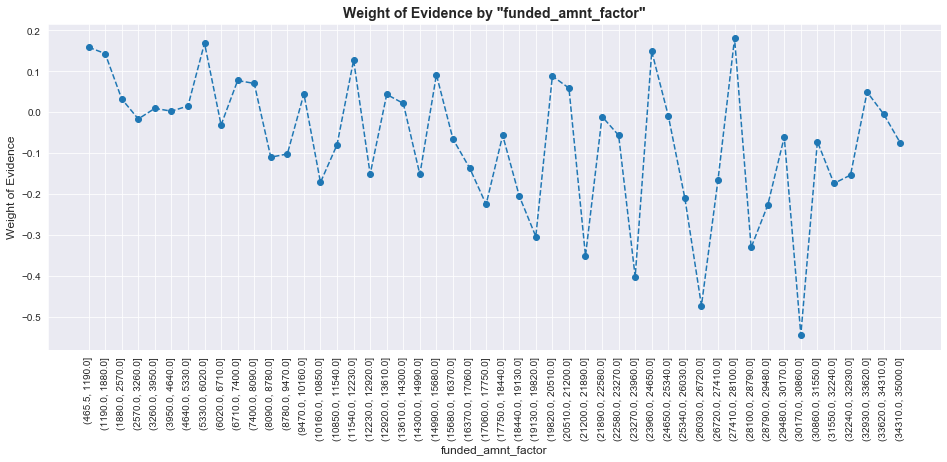

In [104]:
plot_by_woe(df_Con_Woe_IV_funded_amnt,90)

1. if we look at the graph above the pattern is quite straight horizontal. there seems to be no association between 'funded_amnt' and WoE
2. if we look at the Information Value of `funded_amnt` it has very low value (0.014139). this point is confirm our first point. and it lead us to conclusion that `funded_amnt` has no association to the independent variable (`good_bad`)
3. according to our points above, we leave the `funded_amnt` as it is and not to proceed it into coarse classing & crate dummy
4. probably we'll not using this variable in our PD Model

### `mths_since_earliest_cr_line`

In [105]:
df_inputs_prepr['mths_since_earliest_cr_line'].unique()

array([372., 240., 317., 230., 233., 214., 155., 194., 165., 239., 169.,
       237., 398., 173., 175., 110., 202., 184.,  93., 204., 218., 255.,
       152., 103., 276., 215., 326., 289., 187., 180., 186., 306., 164.,
       304., 192., 235., 244., 181., 114., 312., 190., 212., 157., 229.,
       273., 405., 185., 148., 261., 147., 234., 242.,  99., 243., 158.,
       178., 277., 168., 197., 142., 136., 223., 129., 412., 256., 150.,
       254., 106., 464., 128., 266., 272., 236., 296., 288., 346., 163.,
       156., 593., 251., 222., 300., 122., 268., 205., 219., 335., 231.,
       310., 135., 432., 303., 172., 313., 258., 138., 151., 259., 220.,
       166., 143., 499., 260., 225., 389., 241., 191., 213., 224., 249.,
       488., 332., 161., 141., 353., 357., 413., 322., 227., 302., 195.,
       200., 246., 159., 117., 275., 299., 318., 182., 497., 356., 217.,
       104., 339., 278., 348., 325., 507., 331., 257., 221., 414., 247.,
       267., 102., 291., 384., 179.,  79., 193., 25

In [106]:
df_inputs_prepr['mths_since_earliest_cr_line'].nunique()

660

In [107]:
df_inputs_prepr['mths_since_earliest_cr_line'].describe()

count    373028.000000
mean        242.494853
std          87.030884
min           0.000000
25%         183.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [108]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_inputs_prepr['mths_since_earliest_cr_line_factor']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


427211     (354.8, 372.54]
206088    (230.62, 248.36]
136020    (301.58, 319.32]
412305    (212.88, 230.62]
36159     (230.62, 248.36]
                ...       
259178     (266.1, 283.84]
365838     (159.66, 177.4]
131932    (141.92, 159.66]
146867     (248.36, 266.1]
121958    (372.54, 390.28]
Name: mths_since_earliest_cr_line_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(-0.887, 17.74] < (17.74, 35.48] < (35.48, 53.22] < (53.22, 70.96] ... (816.04, 833.78] < (833.78, 851.52] < (851.52, 869.26] < (869.26, 887.0]]

In [109]:
df_Con_Woe_IV_msecl = Woe_IV_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_Con_Woe_IV_msecl

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,"(-0.887, 17.74]",24,0.875000,0.125000,0.006434,21.0,3.0,0.006321,0.007357,-0.151835,1.573565e-06,inf
1,"(17.74, 35.48]",0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(35.48, 53.22]",0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(53.22, 70.96]",0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(70.96, 88.7]",1815,0.898623,0.101377,0.486559,1631.0,184.0,0.490895,0.451224,0.084268,3.343050e-05,inf
5,"(88.7, 106.44]",3873,0.861606,0.138394,1.038260,3337.0,536.0,1.004364,1.314434,-0.269052,8.342487e-04,inf
6,"(106.44, 124.18]",10048,0.867735,0.132265,2.693632,8719.0,1329.0,2.624229,3.259110,-0.216667,1.375580e-03,inf
7,"(124.18, 141.92]",16745,0.865870,0.134130,4.488939,14499.0,2246.0,4.363883,5.507872,-0.232816,2.663392e-03,inf
8,"(141.92, 159.66]",21889,0.877199,0.122801,5.867924,19201.0,2688.0,5.779082,6.591790,-0.131580,1.069361e-03,inf
9,"(159.66, 177.4]",27877,0.882448,0.117552,7.473166,24600.0,3277.0,7.404063,8.036196,-0.081927,5.178868e-04,inf


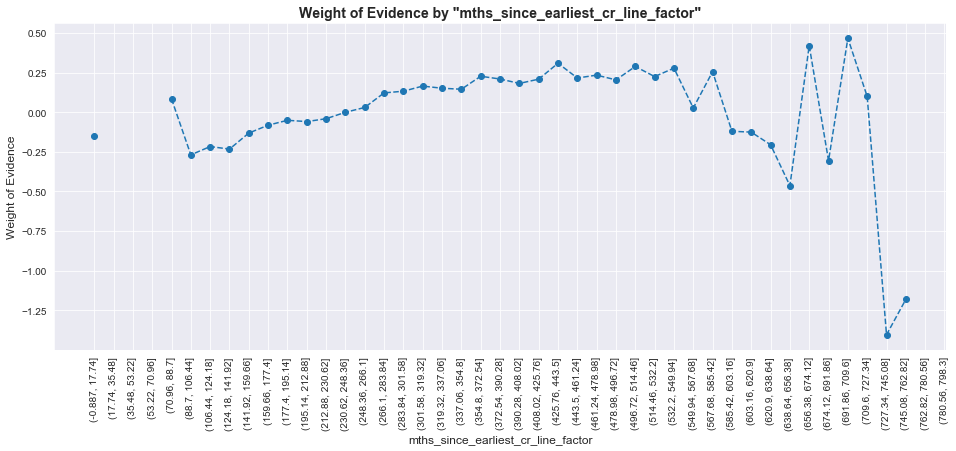

In [110]:
plot_by_woe(df_Con_Woe_IV_msecl, 90)

In [111]:
df_Con_Woe_IV_msecl.iloc[8:, : ]

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
8,"(141.92, 159.66]",21889,0.877199,0.122801,5.867924,19201.0,2688.0,5.779082,6.591790,-0.131580,1.069361e-03,inf
9,"(159.66, 177.4]",27877,0.882448,0.117552,7.473166,24600.0,3277.0,7.404063,8.036196,-0.081927,5.178868e-04,inf
10,"(177.4, 195.14]",35548,0.885619,0.114381,9.529580,31482.0,4066.0,9.475395,9.971063,-0.050989,2.527348e-04,inf
11,"(195.14, 212.88]",39828,0.884805,0.115195,10.676947,35240.0,4588.0,10.606471,11.251165,-0.059007,3.804169e-04,inf
12,"(212.88, 230.62]",39307,0.886636,0.113364,10.537279,34851.0,4456.0,10.489391,10.927461,-0.040915,1.792350e-04,inf
13,"(230.62, 248.36]",29966,0.890643,0.109357,8.033177,26689.0,3277.0,8.032807,8.036196,-0.000422,1.429809e-08,inf
14,"(248.36, 266.1]",27562,0.893585,0.106415,7.388721,24629.0,2933.0,7.412792,7.192604,0.030154,6.639506e-05,inf
15,"(266.1, 283.84]",23062,0.902003,0.097997,6.182378,20802.0,2260.0,6.260948,5.542204,0.121939,8.764317e-04,inf
16,"(283.84, 301.58]",19063,0.902953,0.097047,5.110340,17213.0,1850.0,5.180737,4.536760,0.132734,8.547788e-04,inf
17,"(301.58, 319.32]",12615,0.905747,0.094253,3.381784,11426.0,1189.0,3.438977,2.915788,0.165034,8.634386e-04,inf


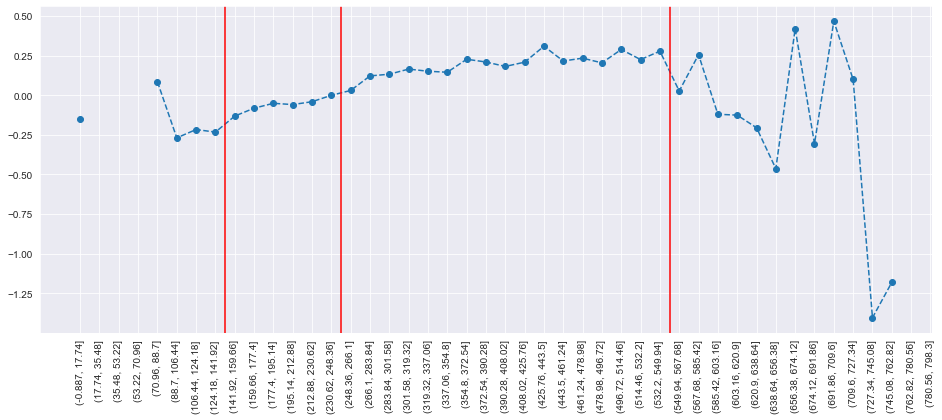

In [112]:
data = df_Con_Woe_IV_msecl
plt.figure(figsize=(16,6))
plt.plot(np.array(data['mths_since_earliest_cr_line_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([7.5], color='red') # <141
plt.axvline([13.5], color='red') # 141 - 248
plt.axvline([30.5], color='red') # 248 - 549
                                # > 549 

plt.show()

In [113]:
# We create the following categories:
# < 141
df_inputs_prepr['mths_since_earliest_cr_line:<141'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(141)), 1, 0)

# 141 - 248
df_inputs_prepr['mths_since_earliest_cr_line:141-248'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(141, 248)), 1, 0)

# 248 - 549
df_inputs_prepr['mths_since_earliest_cr_line:248-549'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 549)), 1, 0)

# > 549
df_inputs_prepr['mths_since_earliest_cr_line:>549'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line']>549), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

### `installment`

In [114]:
df_inputs_prepr['installment'].unique()

array([762.08, 343.39, 648.56, ..., 718.44, 735.11, 464.48])

In [115]:
df_inputs_prepr['installment'].nunique()

51429

In [116]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
df_Con_Woe_IV_installment = Woe_IV_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_Con_Woe_IV_installment

,installment_factor,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,"(14.276, 43.556]",1812,0.906181,0.093819,0.485754,1642.0,170.0,0.494206,0.416891,0.170127,1.315331e-04,0.013497
1,"(43.556, 71.443]",4841,0.897542,0.102458,1.297758,4345.0,496.0,1.307750,1.216342,0.072460,6.623439e-05,0.013497
2,"(71.443, 99.329]",6824,0.893025,0.106975,1.829353,6094.0,730.0,1.834161,1.790181,0.024270,1.067415e-05,0.013497
3,"(99.329, 127.216]",9138,0.890348,0.109652,2.449682,8136.0,1002.0,2.448758,2.457207,-0.003444,2.910056e-07,0.013497
4,"(127.216, 155.102]",10040,0.896514,0.103486,2.691487,9001.0,1039.0,2.709105,2.547943,0.061332,9.884391e-05,0.013497
5,"(155.102, 182.988]",16816,0.894208,0.105792,4.507973,15037.0,1779.0,4.525809,4.362647,0.036717,5.990905e-05,0.013497
6,"(182.988, 210.875]",17216,0.904798,0.095202,4.615203,15577.0,1639.0,4.688337,4.019324,0.153964,1.030040e-03,0.013497
7,"(210.875, 238.761]",15090,0.900398,0.099602,4.045273,13587.0,1503.0,4.089391,3.685811,0.103905,4.193408e-04,0.013497
8,"(238.761, 266.648]",18842,0.901391,0.098609,5.051095,16984.0,1858.0,5.111813,4.556378,0.115026,6.388952e-04,0.013497
9,"(266.648, 294.534]",20100,0.891095,0.108905,5.388335,17911.0,2189.0,5.390820,5.368091,0.004225,9.603802e-07,0.013497


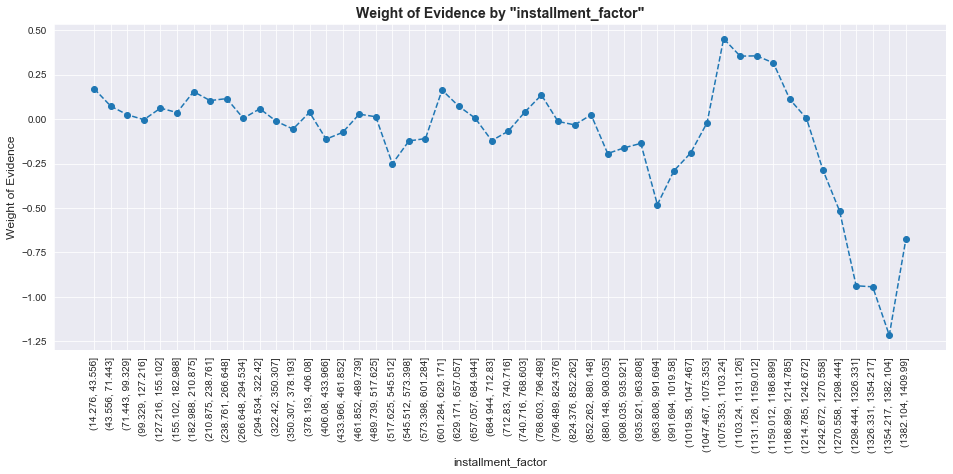

In [118]:
plot_by_woe(df_Con_Woe_IV_installment, 90)

### `delinq_2yrs`

In [119]:
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  1.,  4.,  2.,  5.,  3.,  6.,  9.,  8.,  7., 11., 24., 10.,
       12., 18., 13., 14., 17., 19., 15., 16., 22., 21., 29.])

In [120]:
df_inputs_prepr['delinq_2yrs'].nunique()
# No need to fine classing

24

In [121]:
df_Con_Woe_IV_delinq_2yrs= Woe_IV_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_Con_Woe_IV_delinq_2yrs

,delinq_2yrs,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,0.0,306417,0.890499,0.109501,82.143164,272864.0,33553.0,82.126110,82.282113,-0.001898,2.960552e-06,inf
1,1.0,44927,0.893249,0.106751,12.043868,40131.0,4796.0,12.078555,11.761244,0.026622,8.447431e-05,inf
2,2.0,13118,0.889007,0.110993,3.516626,11662.0,1456.0,3.510008,3.570553,-0.017102,1.035459e-05,inf
3,3.0,4550,0.883297,0.116703,1.219748,4019.0,531.0,1.209631,1.302173,-0.073719,6.822026e-05,inf
4,4.0,1868,0.898822,0.101178,0.500767,1679.0,189.0,0.505342,0.463485,0.086462,3.619039e-05,inf
5,5.0,966,0.881988,0.118012,0.258962,852.0,114.0,0.256433,0.279563,-0.086357,1.997357e-05,inf
6,6.0,501,0.902196,0.097804,0.134306,452.0,49.0,0.136042,0.120163,0.124117,1.970890e-05,inf
7,7.0,279,0.860215,0.139785,0.074793,240.0,39.0,0.072235,0.095640,-0.280668,6.569040e-05,inf
8,8.0,148,0.905405,0.094595,0.039675,134.0,14.0,0.040331,0.034332,0.161037,9.660378e-06,inf
9,9.0,89,0.887640,0.112360,0.023859,79.0,10.0,0.023777,0.024523,-0.030882,2.303044e-07,inf


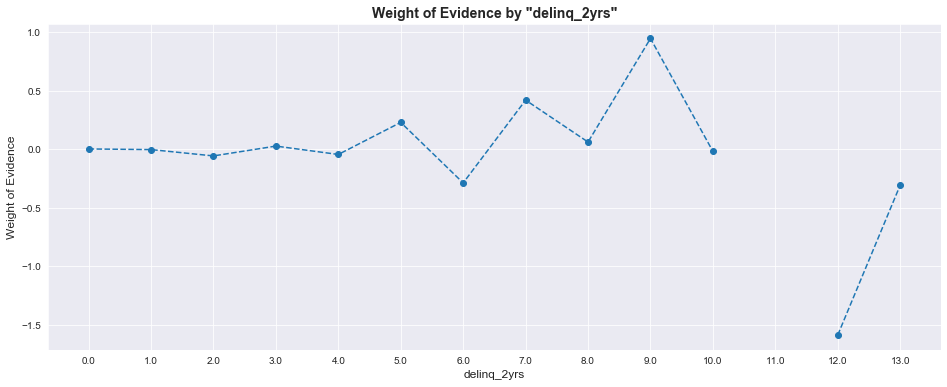

In [441]:
plot_by_woe(df_delinq_2yrs)

In [442]:
# Categories: 0 
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
# Categories: 1-3
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
# Categories: >=4
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

### `inq_last_6mths`

In [125]:
df_inputs_prepr['inq_last_6mths'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.,  9., 12., 28., 11.,
       15., 14., 13., 10., 20., 16., 24., 17., 33., 18., 31., 19., 25.,
       27., 32.])

In [126]:
df_inputs_prepr['inq_last_6mths'].nunique()

28

In [127]:
df_Con_Woe_IV_inq_last6 = Woe_IV_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_Con_Woe_IV_inq_last6

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,sum_IV
0,0.0,193232,0.908395,0.091605,51.800937,175531.0,17701.0,52.831001,43.408210,0.196450,1.851103e-02,inf
1,1.0,104163,0.884950,0.115050,27.923641,92179.0,11984.0,27.743868,29.388396,-0.057585,9.470026e-04,inf
2,2.0,46214,0.864197,0.135803,12.388882,39938.0,6276.0,12.020467,15.390652,-0.247150,8.329398e-03,inf
3,3.0,20040,0.839671,0.160329,5.372251,16827.0,3213.0,5.064560,7.879249,-0.441965,1.243995e-02,inf
4,4.0,5810,0.848365,0.151635,1.557524,4929.0,881.0,1.483521,2.160479,-0.375911,2.544758e-03,inf
5,5.0,2217,0.824989,0.175011,0.594325,1829.0,388.0,0.550489,0.951493,-0.547226,2.194399e-03,inf
6,6.0,977,0.788127,0.211873,0.261911,770.0,207.0,0.231753,0.507627,-0.784073,2.163050e-03,inf
7,7.0,159,0.679245,0.320755,0.042624,108.0,51.0,0.032506,0.125067,-1.347439,1.247214e-03,inf
8,8.0,101,0.643564,0.356436,0.027076,65.0,36.0,0.019564,0.088283,-1.506877,1.035515e-03,inf
9,9.0,43,0.674419,0.325581,0.011527,29.0,14.0,0.008728,0.034332,-1.369506,3.506467e-04,inf


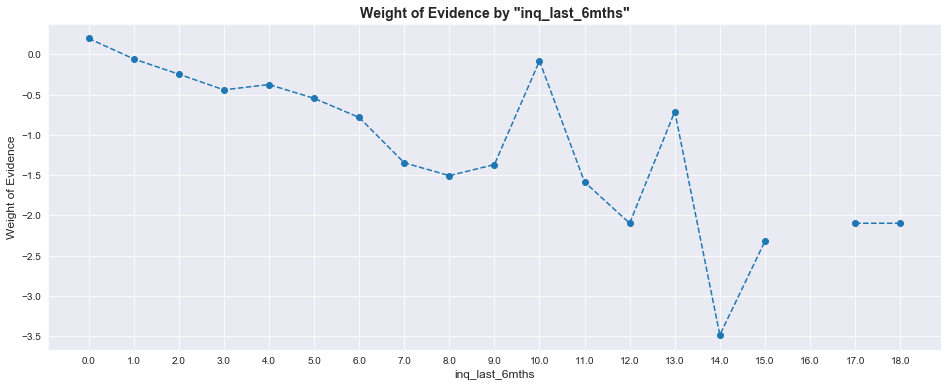

In [128]:
plot_by_woe(df_Con_Woe_IV_inq_last6,0)

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

### `annual_inc`

In [122]:
df_inputs_prepr['annual_inc'].unique()

array([ 77000., 112000.,  84000., ..., 101211.,  56603., 148112.])

In [123]:
df_inputs_prepr['annual_inc'].nunique()

26893

In [124]:
# Fine Classing
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_inputs_prepr['annual_inc_factor']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


427211    (-5243.882, 144693.64]
206088    (-5243.882, 144693.64]
136020    (-5243.882, 144693.64]
412305    (-5243.882, 144693.64]
36159     (-5243.882, 144693.64]
                   ...          
259178    (-5243.882, 144693.64]
365838    (-5243.882, 144693.64]
131932    (-5243.882, 144693.64]
146867    (-5243.882, 144693.64]
121958    (-5243.882, 144693.64]
Name: annual_inc_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(-5243.882, 144693.64] < (144693.64, 287491.28] < (287491.28, 430288.92] < (430288.92, 573086.56] ... (6570587.44, 6713385.08] < (6713385.08, 6856182.72] < (6856182.72, 6998980.36] < (6998980.36, 7141778.0]]